In [17]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/explann')

from explann.dataio import ImportData
from explann.plot import LinearRegDiagnostic

In [7]:
table = ImportData("""Observação	Dureza	Temperatura
1	137	220
2	137	220
3	137	220
4	136	220
5	135	220
6	135	225
7	133	225
8	132	225
9	133	225
10	133	225
11	128	230
12	124	230
13	126	230
14	129	230
15	126	230
16	122	235
17	122	235
18	122	235
19	119	235
20	122	235""", delimiter="\s")

/home/ppiper/Dropbox/local/github/explann/explann/dataio/_readers.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(StringIO(data), delimiter=delimiter, **kwargs)


In [8]:
table.data

,Observação,Dureza,Temperatura
0,1,137,220
1,2,137,220
2,3,137,220
3,4,136,220
4,5,135,220
5,6,135,225
6,7,133,225
7,8,132,225
8,9,133,225
9,10,133,225


In [10]:
from explann.models import FactorialModel

fm = FactorialModel(
    data = table.data,
    functions = {
        "Dureza": "Dureza ~ Temperatura",
    }
)

In [11]:
fm.lack_of_fit()

,Source_of_Variation,df,sum_sq,mean_sq,F,F_table,p
0,Regression,1.0,665.64,665.640000,291.096210,4.413873,1.467493e-12
1,Residual,18.0,41.16,2.286667,NaN,NaN,NaN
2,Lack_of_Fit,2.0,10.76,5.380000,2.831579,3.633723,8.854942e-02
3,Pure_Error,16.0,30.40,1.900000,NaN,NaN,NaN
4,Total,19.0,706.80,NaN,NaN,NaN,NaN


In [12]:
fm.anova()

,df,sum_sq,mean_sq,F,PR(>F)
Temperatura,1.0,665.64,665.640000,291.09621,1.467504e-12
Residual,18.0,41.16,2.286667,NaN,NaN


In [14]:
fm.summary()['Dureza']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Dureza   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     291.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.47e-12
Time:                        14:35:34   Log-Likelihood:                -35.596
No. Observations:                  20   AIC:                             75.19
Df Residuals:                      18   BIC:                             77.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     364.1800     13.765     26.457      0.000     335.261     393.099
Temperatura    -1.0320      0.060    -17.062      0.000      -1.159      -0.905
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.115
Skew:                          -0.182   Prob(JB):                        0.944
Kurtosis:                       2.926   Cond. No.                     9.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
fm.print_equation()

'Dureza = 364.1800 - 1.0320 Temperatura'

In [18]:
ld = LinearRegDiagnostic(fm['Dureza'])

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

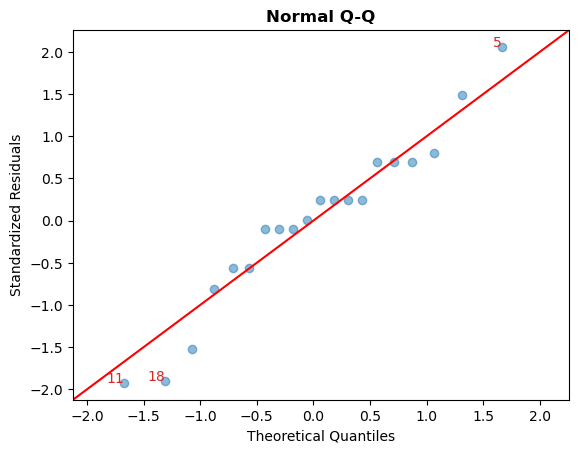

In [20]:
ld.qq_plot()

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

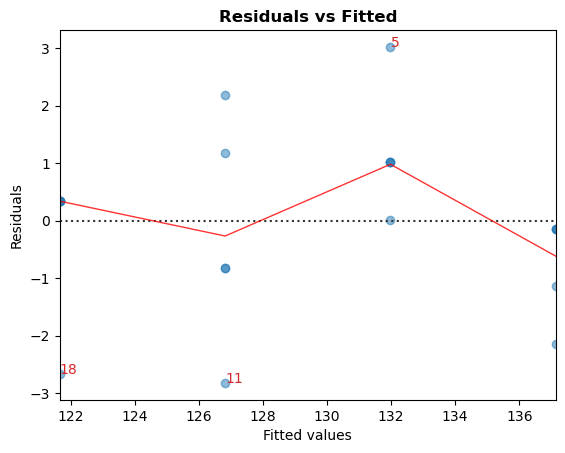

In [21]:
ld.residual_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

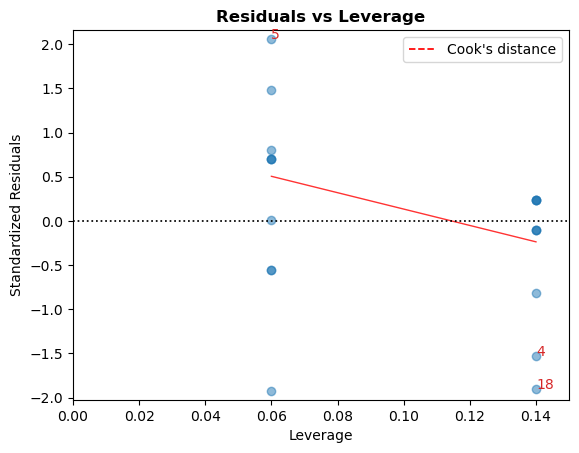

In [22]:
ld.leverage_plot()

In [25]:
dir(fm['Dureza'])

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.939   
Dependent Variable: Dureza           AIC:                75.1922 
Date:               2023-07-12 15:05 BIC:                77.1837 
No. Observations:   20               Log-Likelihood:     -35.596 
Df Model:           1                F-statistic:        291.1   
Df Residuals:       18               Prob (F-statistic): 1.47e-12
R-squared:          0.942            Scale:              2.2867  
-----------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept     364.1800  13.7649  26.4571 0.0000 335.2610 393.0990
Temperatura    -1.0320   0.0605 -17.0615 0.0000  -1.1591  -0.9049
-----------------------------------------------------------------
Omnibus:               0.433        Durbin-Watson:          2.235
Prob(Omnibus):         0.805        Jarque-Bera (JB):       0.115
Skew:                  -0.182       Prob(JB):               0.944
Kurtosis:              2.926        Condition No.:          9264 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""